In [79]:
using PyPlot
using Distributions
using Interact

In [23]:
function Observations(w,n) # w is the actual wight and n is number of observations
    Data = Array(1:n)
    for i=1:n
        if rand() < w
            Data[i]= 1
        else 
            Data[i]= 0 
        end
    end
    return Data
end

Observations (generic function with 1 method)

In [83]:
function CoinProblem(Data) #Data vector containts the observations
    H= [0:0.001:1...] # Hypothesis for the wight of the coin 
    μ= 0.5
    σ= 0.65 - 0.35
    
    Perior_uniform = pdf(Uniform(),H) 
    Perior_normal= pdf(Normal(μ,(σ/6)),H)
    Perior_beta= pdf(Beta(0.5,0.5),H)
    Perior_beta[1]= 1
    Perior_beta[end]= 1
    
    r= sum(Data)
    n= length(Data)
    
    Likelihood= H.^r .* (1 .- H).^(n-r)
    
    Posterior_uniform= Likelihood .* Perior_uniform
    Posterior_normal= Likelihood .* Perior_normal
    Posterior_beta= Likelihood .* Perior_beta
    
    return H, Posterior_uniform, Posterior_normal, Posterior_beta
end

CoinProblem (generic function with 1 method)

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.5,"w",0.5,0.0:0.05:1.0)

Interact.Slider{Int64}([Reactive.Input{Int64}] 500,"n",500,1:1000)

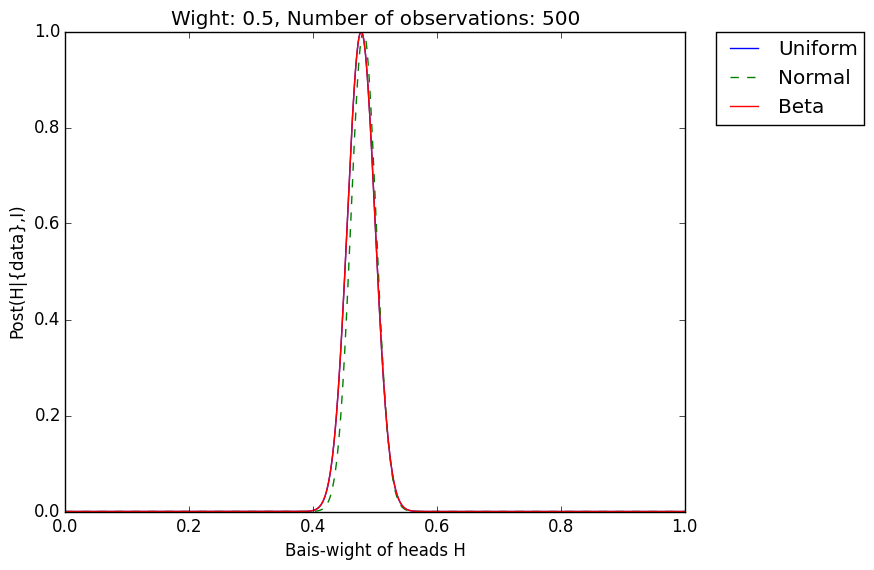

In [96]:
f= figure()
@manipulate for w=0:0.05:1, n=1:1000 ; withfig(f) do
        Data= Observations(w,n)
        H, Posterior_uniform, Posterior_normal, Posterior_beta= CoinProblem(Data)
        plot(H, (Posterior_uniform)./maximum(Posterior_uniform),label="Uniform")
        plot(H, Posterior_normal./maximum(Posterior_normal),"g--",label="Normal")
        plot(H, Posterior_beta./maximum(Posterior_beta),"r",label="Beta")
        xlabel("Bais-wight of heads H")
        ylabel("Post(H|{data},I)")
        title("Wight: $w, Number of observations: $n")
        legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    end
end
    

In [3]:
using Latex

INFO: Recompiling stale cache file C:\Users\Magy\.julia\lib\v0.4\Images.ji for module Images.
INFO: Recompiling stale cache file C:\Users\Magy\.julia\lib\v0.4\ColorVectorSpace.ji for module ColorVectorSpace.
INFO: Recompiling stale cache file C:\Users\Magy\.julia\lib\v0.4\FileIO.ji for module FileIO.
INFO: Recompiling stale cache file C:\Users\Magy\.julia\lib\v0.4\Graphics.ji for module Graphics.
